In [2]:
import sys
import os
import numpy as np

sys.path.append(os.path.abspath("../../mathematical_models"))
from mathematical_models.s_on_f import ScalarOnFunctionModel

sys.path.append(os.path.abspath("../../optimizers"))
from optimizers.cordex_continuous import CordexContinuous
from optimizers.cordex_discrete import CordexDiscrete

sys.path.append(os.path.abspath("../../utilities"))
from utilities.plotting.plot_fun import subplot_results, subplot_b_spline_results

### Settings

In [3]:
N = 4 # runs
Kx_family = 'step'
Kx = [[4]]
Kb = [[2]] # Polynomial
epochs = 100
refinement_epochs = 100
lvls = [-1, 1]
s_on_f_model = ScalarOnFunctionModel(Kx=Kx[0], Kb= Kb[0], Kx_family=Kx_family)

### Continuous

In [5]:
optimizer_s_on_f = CordexContinuous(model=s_on_f_model, runs=N)
best_design_s_on_f, best_objective_value_s_on_f = optimizer_s_on_f.optimize(epochs=epochs)

100%|██████████| 100/100 [00:00<00:00, 416.14it/s]


Best objective value (A): 8.75


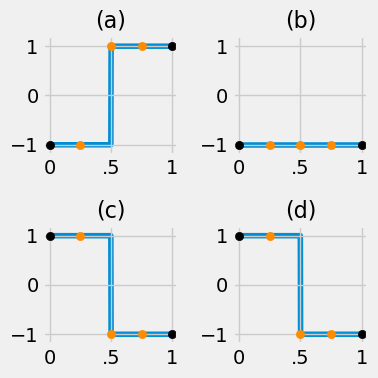

In [6]:
subplot_results(sub_x=2, sub_y=2, T=np.linspace(0, 1, 500), results=best_design_s_on_f, style='fivethirtyeight', save=False)
print(f'Best objective value (A): {np.round(best_objective_value_s_on_f,2)}')

### Discrete

In [8]:
optimizer_s_on_f = CordexDiscrete(model=s_on_f_model, runs=N, levels=lvls)
best_design_s_on_f, best_objective_value_s_on_f = optimizer_s_on_f.optimize(epochs=epochs)

100%|██████████| 100/100 [00:00<00:00, 1317.97it/s]


Best objective value (A): 8.75


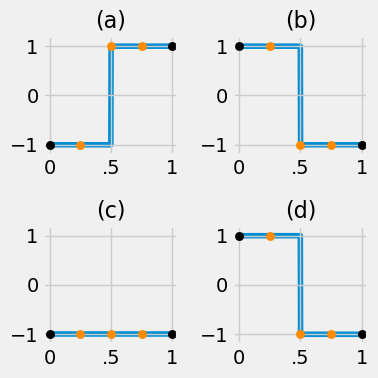

In [9]:
subplot_results(sub_x=2, sub_y=2, T=np.linspace(0, 1, 500), results=best_design_s_on_f, style='fivethirtyeight', save=False)
print(f'Best objective value (A): {np.round(best_objective_value_s_on_f,2)}')

### NBDO

### Test Js

In [7]:
# Step - Poly
s_on_f_model = ScalarOnFunctionModel(Kx=Kx[0], Kb= Kb[0], Kx_family=Kx_family)
s_on_f_model.get_Jcb()

array([[0.25   , 0.03125],
       [0.25   , 0.09375],
       [0.25   , 0.15625],
       [0.25   , 0.21875]])

In [8]:
# B-spline - Poly
k_degree = 3
Kx_family = 'b-spline'
s_on_f_model = ScalarOnFunctionModel(Kx=Kx[0], Kb= Kb[0], Kx_family=Kx_family, k_degree=k_degree)
s_on_f_model.get_Jcb()

array([[0.25, 0.05],
       [0.25, 0.1 ],
       [0.25, 0.15],
       [0.25, 0.2 ]])

### Test plotting b-spline basis

In [9]:
s_on_f_model = ScalarOnFunctionModel(Kx=Kx[0], Kb= Kb[0], Kx_family=Kx_family, k_degree=k_degree)
optimizer_s_on_f = CordexContinuous(model=s_on_f_model, runs=N)

In [10]:
best_design_s_on_f, best_objective_value_s_on_f = optimizer_s_on_f.fit(epochs=epochs)

100%|██████████| 100/100 [00:00<00:00, 285.80it/s]


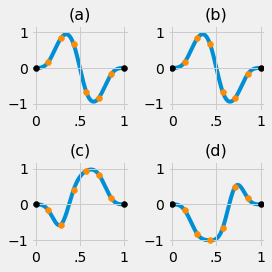

Best objective value (A): 12.41


In [11]:
subplot_b_spline_results(2, 2, np.linspace(0,1,1000), best_design_s_on_f, k_degree)
print(f'Best objective value (A): {np.round(best_objective_value_s_on_f,2)}')